In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [166]:
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [167]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [168]:
dataset.isna().sum() # check missing values

Review    0
Liked     0
dtype: int64

In [169]:
dataset.shape

(1000, 2)

<Axes: ylabel='count'>

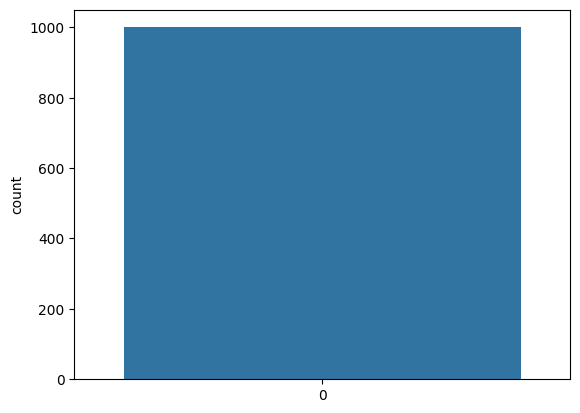

In [170]:
sns.countplot(dataset['Liked'])

In [171]:
import re # regular expression - matching & searching in text data
import nltk # natural language toolkit -- NLTK offers a wide range of features and functionalities for tasks such as tokenization, stemming, lemmatization, part-of-speech tagging, parsing, and more.
nltk.download('stopwords')
#from nltk.corpus import stopwords

#words = word_tokenize("This is a sample sentence with some stopwords.")
#filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
#print(filtered_words)'''


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [172]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
##  Examples of stopwords in English include "the," "and," "in," "of," etc.
##  it is common to remove these stopwords from text data to focus on more meaningful words or tokens.
##  PorterStemmer -- removing suffixes -- running - run


In [173]:
corpus=[]
## corpus -- collection of text documents


In [174]:
dataset['Review'][1]

'Crust is not good.'

In [175]:
# text cleaning
for i in range(0,1000):
  review = re.sub('[^a-zA-Z]' ,' ',dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]



In [176]:
review

['wast',
 'enough',
 'life',
 'pour',
 'salt',
 'wound',
 'draw',
 'time',
 'took',
 'bring',
 'check']

In [177]:
for i in range(0,1000):
  review = re.sub('[^a-zA-Z]' ,' ',dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join (review) # converts vertical to horizontal

In [178]:
review

'wast enough life pour salt wound draw time took bring check'

In [179]:
for i in range(0,1000):
  review = re.sub('[^a-zA-Z]' ,' ',dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join (review) # converts vertical to horizontal
  corpus.append(review) # after data cleaning we add all the data

In [180]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [181]:
from sklearn.feature_extraction.text import CountVectorizer # sklearn.feature_extraction.text-> text data into numerical features
vectorizer = CountVectorizer() # Converts text data into a matrix of word
x = vectorizer.fit_transform(corpus).toarray() # converting corpus in to bag of words
y = dataset.iloc[: ,-1].values

# bag of words
'''Example 1:
Text: "The cat is on the mat."
Bag of Words: ["the", "cat", "is", "on", "the", "mat"]

the text is tokenized into individual words, and the
resulting bag of words represents the frequency or presence of each word in the text.'''



In [182]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [183]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [185]:
## The train_test_split function  is used to split a dataset into two or more subsets
## Splitting the data into a training set and a testing set

from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x, y , test_size=0.2 , random_state = 0)



In [186]:
from sklearn.naive_bayes import GaussianNB ## GaussianNB ---> continuous or real-valued features
classifier = GaussianNB()
classifier.fit(x_train, y_train)


GaussianNB()

In [187]:
y_pred = classifier.predict(x_test)

<Axes: >

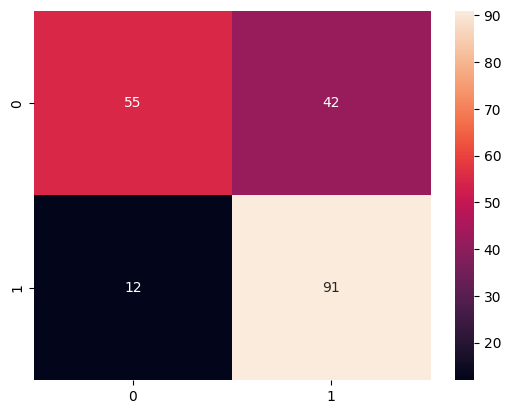

In [188]:

from sklearn.metrics import confusion_matrix , accuracy_score
cm  = confusion_matrix(y_test , y_pred) #It shows the number of true positive, true negative, false positive, and false negative predictions made by the model.
sns.heatmap(cm , annot=True) # The sns.heatmap() function from the Seaborn library (often imported as sns) is used to create a heatmap visualization of a matrix, such as a confusion matrix.
                              # annot-- gives exact values

In [189]:
accuracy_score(y_test , y_pred)

0.73

In [191]:
x_pred = np.array(['The food was delicious'])
x_pred = vectorizer.transform(x_pred).toarray()
classifier.predict(x_pred)

array([1])